<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/Unsupervised%20Learning%20Project%3A%20AllLife%20Bank%20Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [ ]:
from google.colab import files
upload = files.upload()

Saving Credit+Card+Customer+Data.xlsx to Credit+Card+Customer+Data (2).xlsx


In [ ]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

# Installing the sklearn_extra library 
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 


### **Loading the data**

In [ ]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Check the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [ ]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

### **Drop the rows with duplicate customer keys**

*   List item
*   List item



In [ ]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data.duplicated('Customer Key') == True

- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [ ]:
# let's drop duplicate keys
data = data[duplicate_keys == False]

### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [ ]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [ ]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [ ]:
data = data[~data.duplicated()]

In [ ]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:___________**

* The average credit limit is $34543; at least 50% of customers have a credit limit less than 18K, which indicates a high positive skewness.
* On average, the number of credit cards owned by each customers are 4; at least 50% of customers have 5 credit cards, some customers have 10.
* On average, The number of bank visits per customers are 2; the number of online visits are 2, and the average call made are 3. Thus, the majority of customer interact with bank by calls, then online. 

**Now, let's go ahead with exploring each variable at hand.**

### **Question 3: Check the distribution and outliers for each variable in the data.**

- **Check the distribution of all variables (use .hist() attribute) (2 Marks)**
- **Check outliers for all variables (use sns.boxplot()) (2 Mark)**
- **Write your observations (1 Marks)**

Avg_Credit_Limit
Skew : 2.19


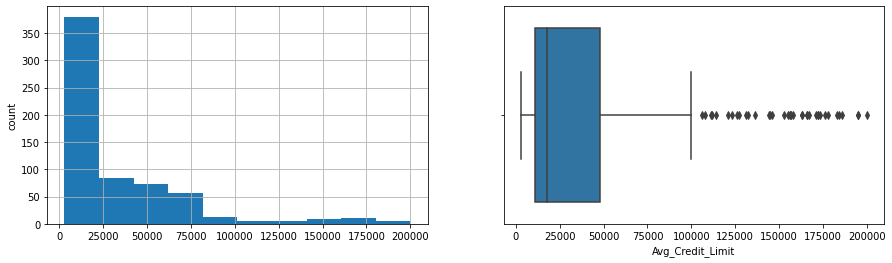

Total_Credit_Cards
Skew : 0.17


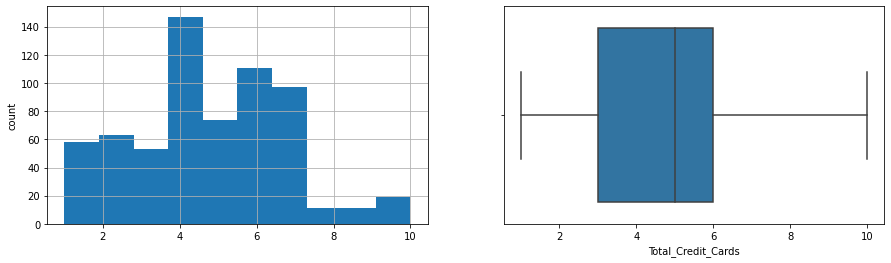

Total_visits_bank
Skew : 0.15


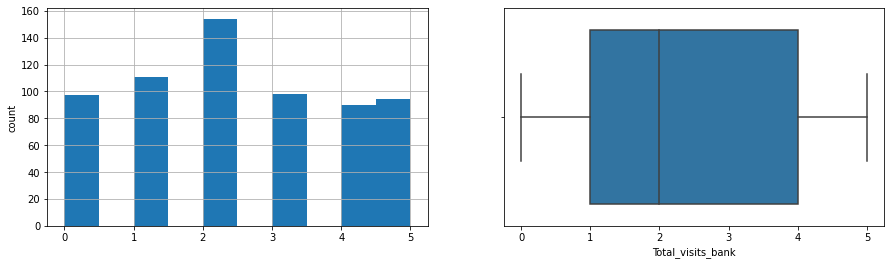

Total_visits_online
Skew : 2.21


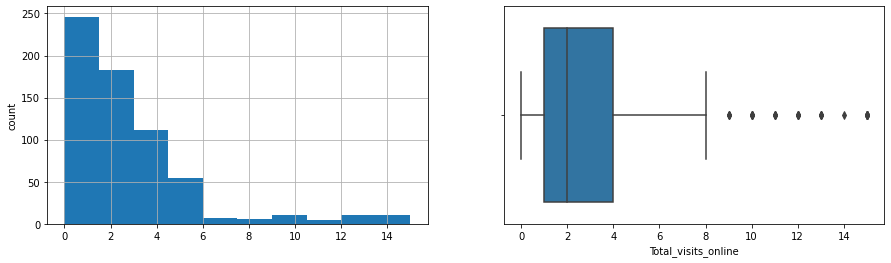

Total_calls_made
Skew : 0.65


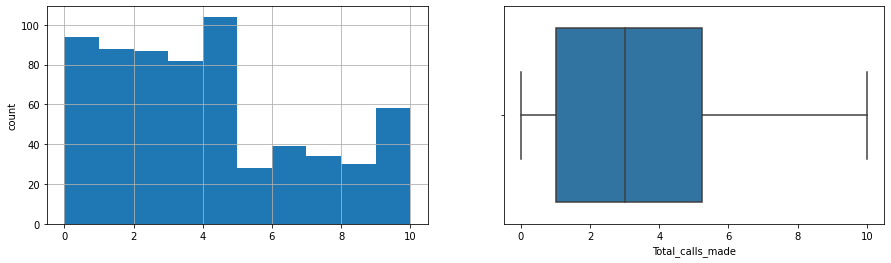

In [ ]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors 

for col in data.columns:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist()
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observation:______________**

* The distribution of average credit limit and total visit online are right skewed. Both have outliers. 
* The customers who have high credit limits cause the skewness.



### **Checking correlation**

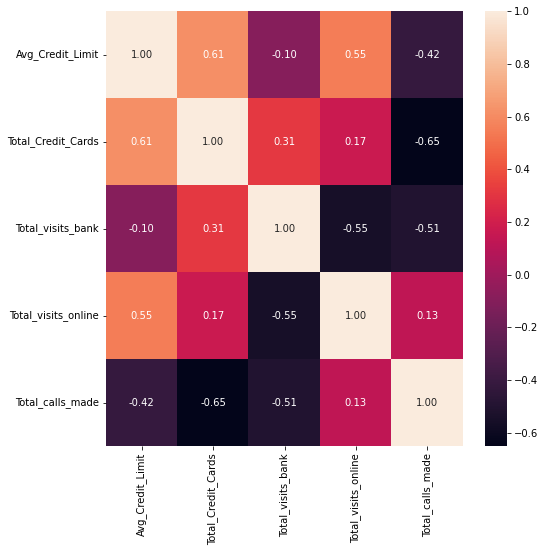

In [ ]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scaling the data**

In [ ]:
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Applying PCA on scaled data**

In [ ]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [ ]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

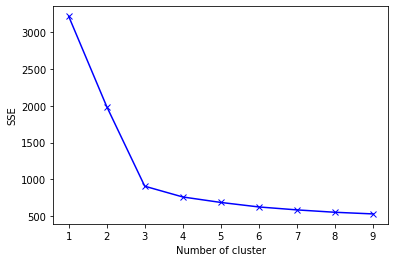

In [ ]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the pca components to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

- **Fit the K-means algorithms on the pca components with the number of clusters equal to 3**
- **Store the predictions as 'Labels' to the 'data_copy' and 'data' DataFrames**

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)                       # Apply the K-Means algorithm
kmeans.fit(data_scaled)                            # Fit the kmeans function on the pca components

# Adding predicted labels to the original data and the copied data 
data_copy['Labels'] = kmeans.predict(data_scaled)     # Save the predictions on the pca components from K-Means
data['Labels'] = kmeans.predict(data_scaled)             # Save the predictions on the pca components from K-Means

**Observations:**
* In the above graph, we can find that elbow point is achieved for k=3
* The optimal K for a dataset are at the point where the decrease in inertia begins to slow in the elbow method.
* We will fit the k-means again with k=3 based on the labels. 

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

### **Create the cluster profiles using the below summary statistics and box plots for each label**

In [ ]:
# Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


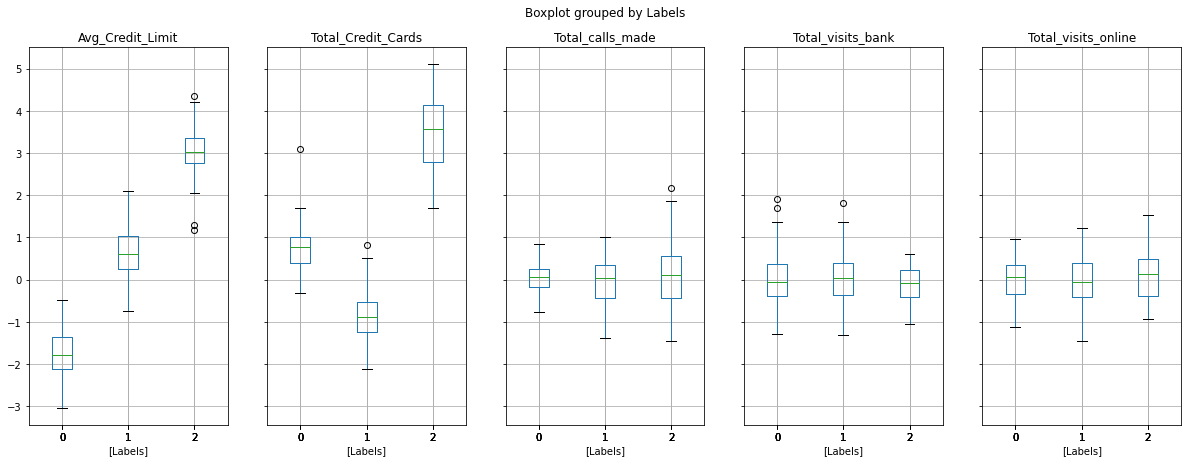

In [ ]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:_______________**

Group 0:
* Customers in group 0 have the minimum credit limit, which is 12K in average.
* Customers in group 0 have the the lowest credit cards, which are 2 cards per person.
* Customers in group 0 prefer to interact with bank by phone call rather than online and direct visit.

Group 1:
* Customers in group 1 prefer to interact with bank by direct visit.
* Customers in group 1 have the middle credit limits, which is 34K in average.
* Customers in group 1 have the middle average numner of credit cards, which are 2 cards per person.

Group 2:
* Customers in group 2 have the maximum credit limit, which is about 140$.
* Customers in group 2 have the largest number of credit card, which are 8 on average.
* Customers in group 2 prefer to interact with bank online, rather than by phone call or direct visit.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.


- **Apply the Gaussian Mixture Model algorithm on the pca components with n_components=3 and random_state=1** 
- **Create the cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [ ]:
gmm = GaussianMixture(n_components=3, random_state=1)      # Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1

gmm.fit(data_scaled)    # Fit the model on the pca components

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [ ]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    582
2     37
0     25
Name: GmmLabels, dtype: int64

In [ ]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,13240.00,27963.917526,152432.432432,11000.0,17000.0,157000.0
Total_Credit_Cards,4.08,4.482818,8.432432,4.0,4.0,9.0
Total_visits_bank,3.92,2.448454,0.540541,4.0,2.0,1.0
Total_visits_online,1.64,2.125430,11.135135,2.0,2.0,11.0
Total_calls_made,3.64,3.750859,1.351351,4.0,3.0,1.0


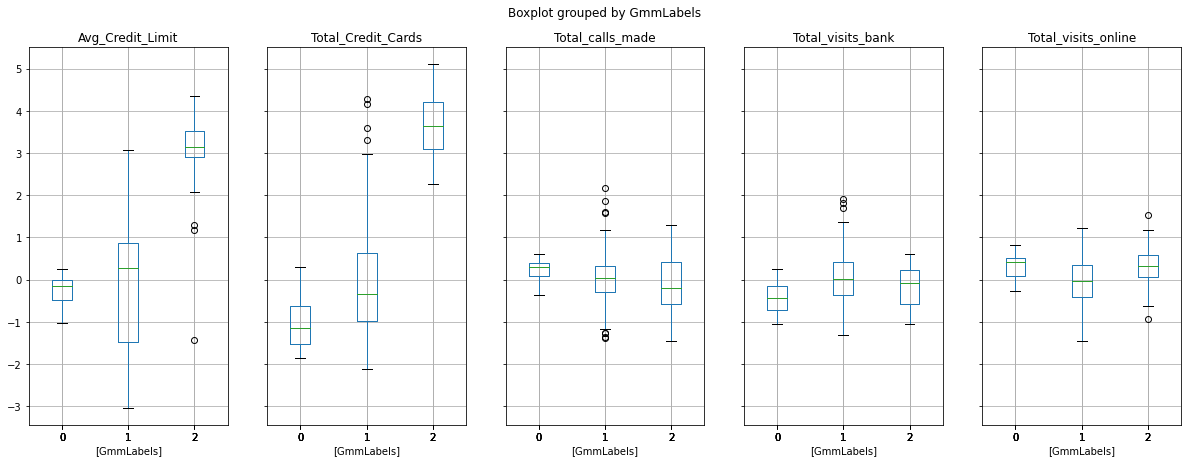

In [ ]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Cluster Profiles:____________**

Group 0:
* Customers in group 0 with the minimum credit limits, which is about 13K on average.
* Customers in group 0 wtih the lowest number of credit cards, which are 4 per person.
* Customers in group 0 prefer to interact with bank by phone call rather than online or direct visit.

Group 1:
* Customers in group 1 with the medium credit limit, which is about 34K on average.
* Customers in group 1 with the medium number of credit cards, which are 5 on average.
* Customers in group 1 prefer to interact with bank by direct visit, rather thank by online or phone calls.

Group 2:
* Customers in group 2 with the maximum credit limits, which is 140K on average. 
* Customers in group 2 have the largest number of credit cards, which are 8 per person.
* Customers in group 2 tend to contact with bank online, rather than direct visit or phone calls. 

**Comparing Clusters:____________**
* Comparing Clusters,we can clearly see that both K-means and GMM algorithms produces clusters with the same clustring profiles.

## **K-Medoids**



- **Apply the K-Medoids clustering algorithm on the pca components with n_clusters=3 and random_state=1** 
- **Create cluster profiles using the below summary statistics and box plots for each label**
- **Compare the clusters from both algorithms - K-Means and K-Medoids**

In [ ]:
kmedo = KMedoids(n_clusters=3, max_iter=1000, random_state=1)      # Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1

kmedo.fit(data_scaled)      # Fit the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

In [ ]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    273
0    249
1    122
Name: kmedoLabels, dtype: int64

In [ ]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,16622.489960,91549.180328,25413.919414,12000.0,70000.0,17000.0
Total_Credit_Cards,4.257028,7.180328,3.981685,4.0,7.0,4.0
Total_visits_bank,3.385542,2.352459,1.512821,4.0,3.0,2.0
Total_visits_online,2.100402,5.286885,1.912088,2.0,2.0,2.0
Total_calls_made,3.811245,1.786885,4.238095,3.0,2.0,4.0


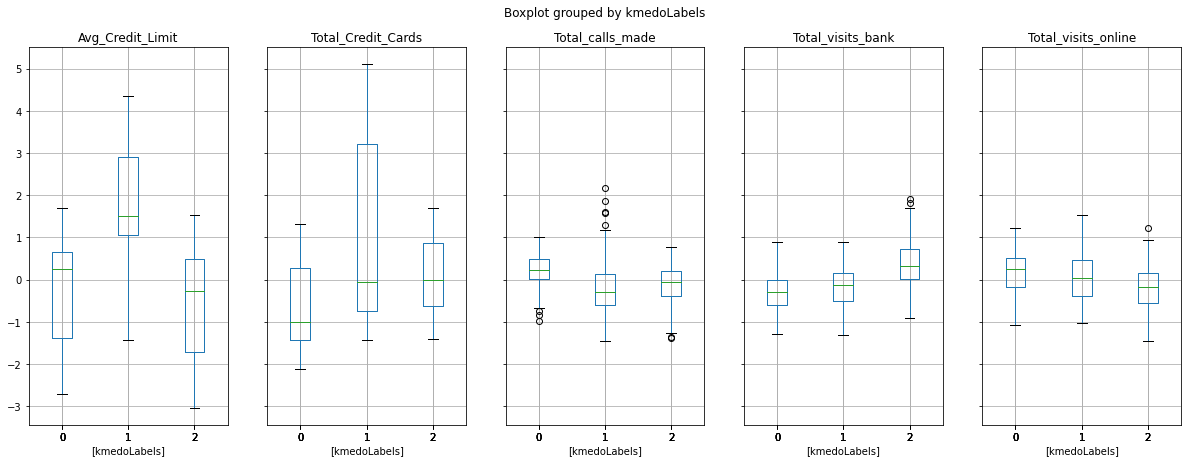

In [ ]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:____________**

Group 0:
* Customers in group 0 have the minimum credit limits, which are 12K on average.
* Customers in group 0 have the lowerst number of credit cards, which are 2 per person.
* Customers in group 0 tends to contact with bank by phone calls, rather than online or direct visit.

Group 1:
* Customers in group 1 have the maximum credit limits, which are 58K on average.
* Customers in group 1 have the largest number of credit cards, which are 7 per person.
* Customers in group 1 prefer to interact with bank online, rather than phone calls or direct visit.

Group 2:
* Customers in group 2 have the medium credit limit, which are 28K on average.
* Customers in group 2 have the medium number of credit cards, which are 5 on average.
* Customers in group 2 tend to direct visit the bank, rather than by phone calls or online.  

Let's compare the clusters from K-Means and K-Medoids 

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,16622.489960,12239.819005,4.257028,2.411765,3.385542,0.945701,2.100402,3.561086,3.811245,6.891403
group_1 Mean,91549.180328,33893.048128,7.180328,5.508021,2.352459,3.489305,5.286885,0.975936,1.786885,1.997326
group_2 Mean,25413.919414,140102.040816,3.981685,8.775510,1.512821,0.591837,1.912088,10.979592,4.238095,1.102041
group_0 Median,12000.000000,12000.000000,4.000000,2.000000,4.000000,1.000000,2.000000,4.000000,3.000000,7.000000
group_1 Median,70000.000000,31500.000000,7.000000,6.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,17000.000000,145000.000000,4.000000,9.000000,2.000000,1.000000,2.000000,11.000000,4.000000,1.000000


**Comparing Clusters:___________________**

* Both K-means and K-Medoids produced one cluster identically (cluster 0).

* K-Medoids clustered the data points differently than K-Means; it centres a  medium point that has a minimum distance with other point , rather than mean as in K-Means. 

* Besides, K-means algorithm is sensitive with outliers; but K-medoids not. With the influence by extreme value, k-means expand cluster 2 as the centroid kept moving towards outliers.